In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
cd /content/drive/My Drive/Bike\ Rental\ Dataset

/content/drive/My Drive/Bike Rental Dataset


In [ ]:
data = pd.read_csv('day.csv')

In [ ]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
data.shape

(731, 16)

In [ ]:
data.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition','hum':'humidity','cnt':'total_count'},inplace=True)

In [ ]:
data.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather_condition', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

In [ ]:
#Type casting the datetime and numerical attributes to category

data['datetime']=pd.to_datetime(data.datetime)
data['season']=data.season.astype('category')
data['year']=data.year.astype('category')
data['month']=data.month.astype('category')
data['holiday']=data.holiday.astype('category')
data['weekday']=data.weekday.astype('category')
data['workingday']=data.workingday.astype('category')
data['weather_condition']=data.weather_condition.astype('category')


In [ ]:
data.dtypes

rec_id                        int64
datetime             datetime64[ns]
season                     category
year                       category
month                      category
holiday                    category
weekday                    category
workingday                 category
weather_condition          category
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
casual                        int64
registered                    int64
total_count                   int64
dtype: object

In [ ]:
data.isnull().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

season 1-> spring season 2 -> summer season 3 -> fall season 4 -> winter



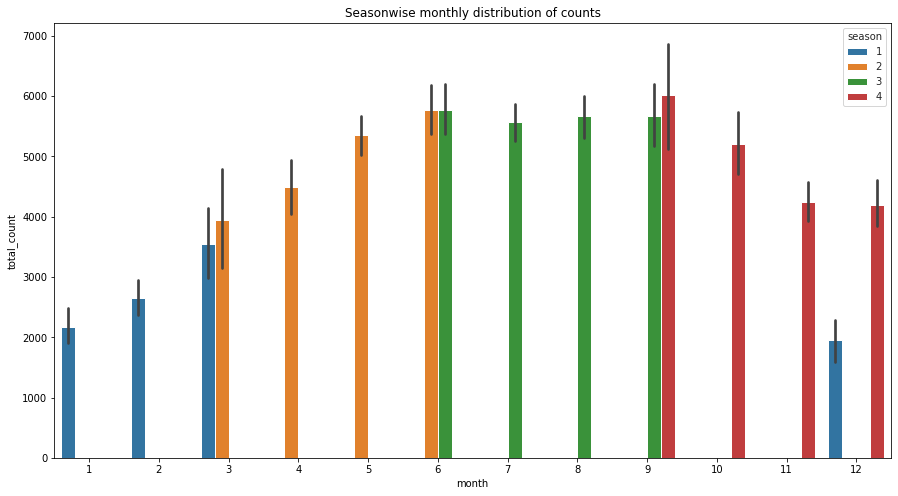

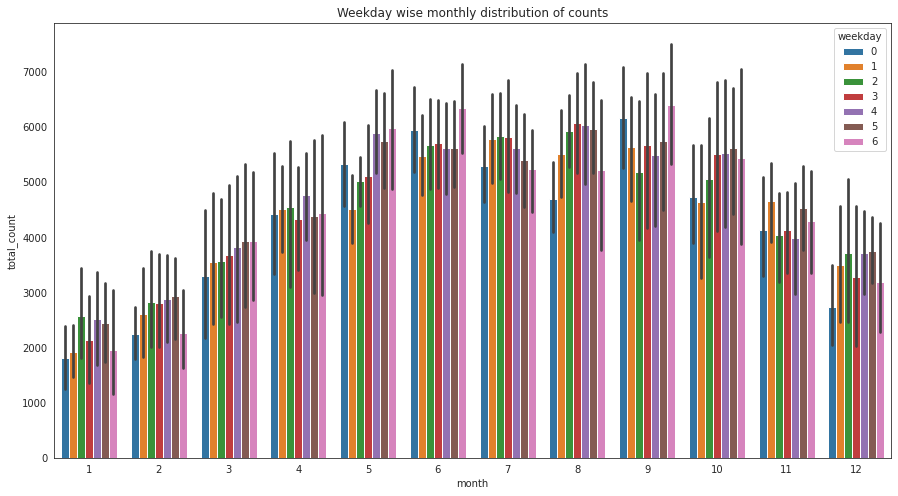

In [ ]:
#Monthly distribution of counts
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='total_count',data=data[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='total_count',data=data[['month','total_count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()


Yearly wise distribution of counts

year 0-> 2011, year 1-> 2012



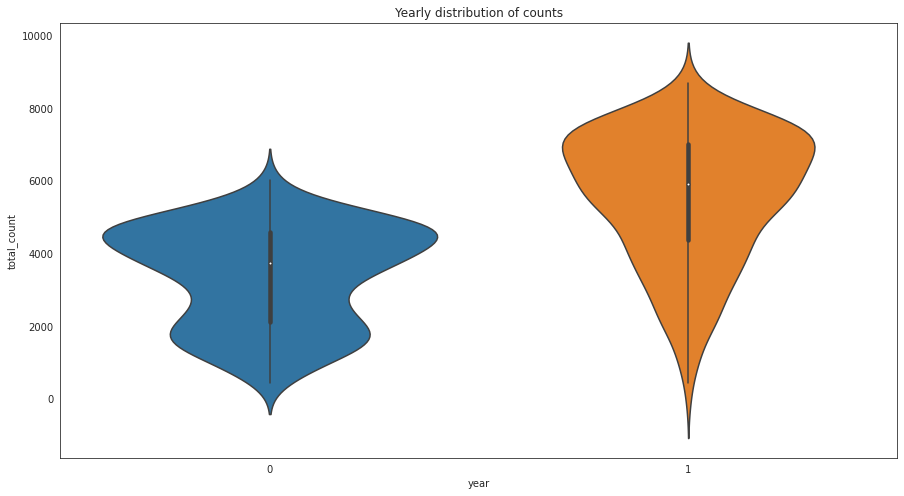

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Violin plot for yearly distribution of counts
sns.violinplot(x='year',y='total_count',data=data[['year','total_count']])
ax.set_title('Yearly distribution of counts')
plt.show()

Holiday wise distribution of counts

Here, 0->No holiday, 1-> holiday



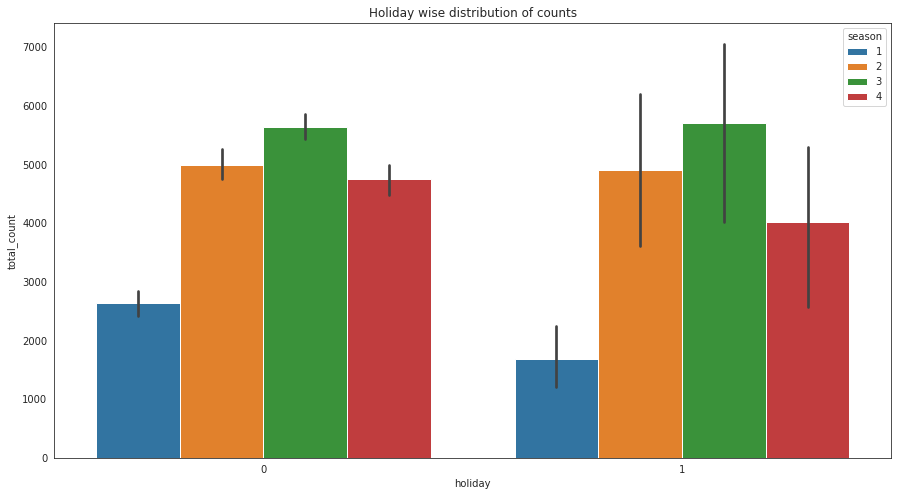

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=data,x='holiday',y='total_count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

Workingday wise distribution of counts

Here, 0-> No workingday, 1-> workingday



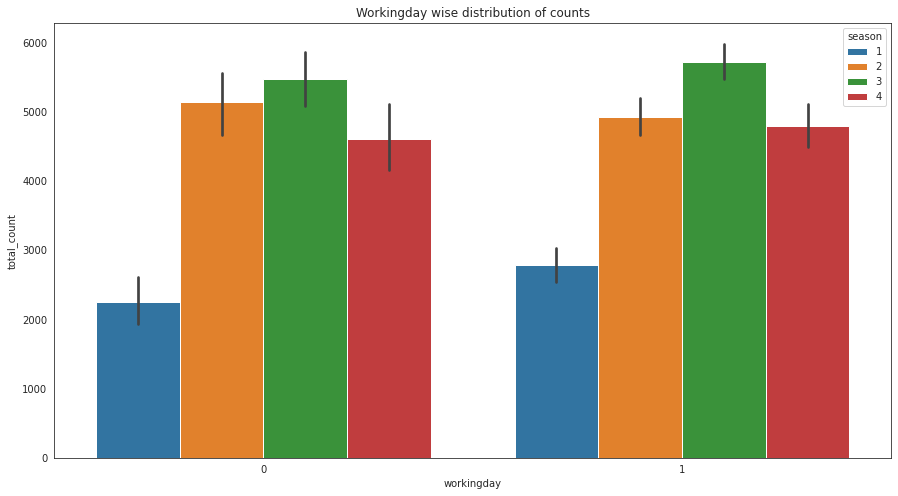

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=data,x='workingday',y='total_count',hue='season')
ax.set_title('Workingday wise distribution of counts')
plt.show()

Weather_condition distribution of counts

From the above bar plot, we can observed that during clear,partly cloudy weather the bike rental count is highest and the second highest is during mist cloudy weather and followed by third highest during light snow and light rain weather.

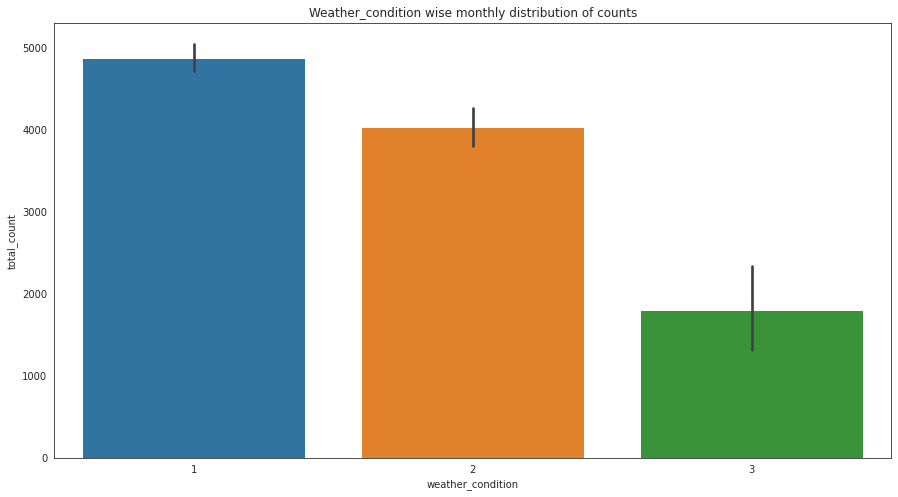

In [ ]:
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weather_condition',y='total_count',data=data[['month','total_count','weather_condition']],ax=ax1)
ax1.set_title('Weather_condition wise monthly distribution of counts')
plt.show()

Total_Count_Outliers

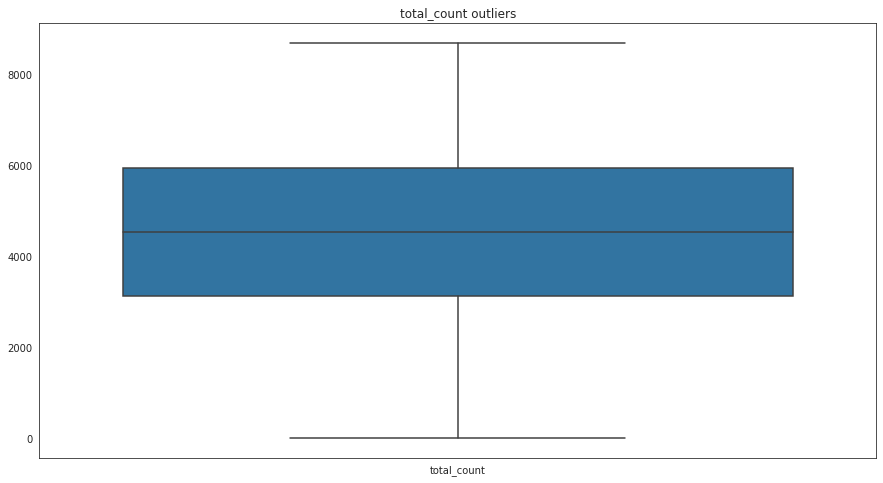

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count outliers
sns.boxplot(data=data[['total_count']])
ax.set_title('total_count outliers')
plt.show()

Temp_windspeed_humidity_outliers

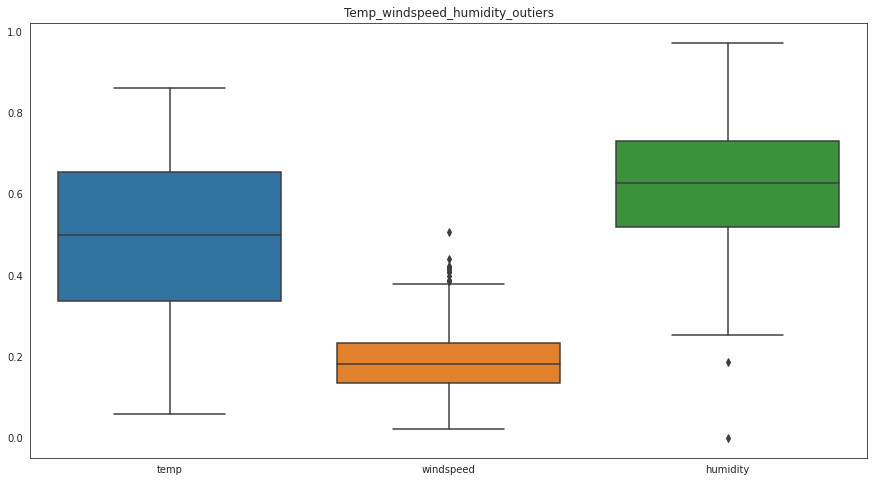

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=data[['temp','windspeed','humidity']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

Replace and impute the outliers

In [ ]:
!pip install fancyimpute

     |████████████████████████████████| 154 kB 6.3 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=0ccc6320be77f04d1d55b2dc6ae96093f202dd93c48bef6f1d27988dfe27c863
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=8f7f7fbc04ba1606d40d3c2505517aac4788a491ca787d8b114e6c3411ad8d1b
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


In [ ]:
from fancyimpute import KNN

#create dataframe for outliers
wind_hum=pd.DataFrame(data,columns=['windspeed','humidity'])
 #Cnames for outliers                     
cnames=['windspeed','humidity']       
                      
for i in cnames:
    q75,q25=np.percentile(wind_hum.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    min=q25-(iqr*1.5) #inner fence
    max=q75+(iqr*1.5) #outer fence
    wind_hum.loc[wind_hum.loc[:,i]<min,:i]=np.nan  #Replace with NA
    wind_hum.loc[wind_hum.loc[:,i]>max,:i]=np.nan  #Replace with NA
#Imputating the outliers by mean Imputation
wind_hum['windspeed']=wind_hum['windspeed'].fillna(wind_hum['windspeed'].mean())
wind_hum['humidity']=wind_hum['humidity'].fillna(wind_hum['humidity'].mean())

Replace the original dataset to imputated data

In [ ]:
#Replacing the imputated windspeed
data['windspeed']=data['windspeed'].replace(wind_hum['windspeed'])
#Replacing the imputated humidity
data['humidity']=data['humidity'].replace(wind_hum['humidity'])
data.head(5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


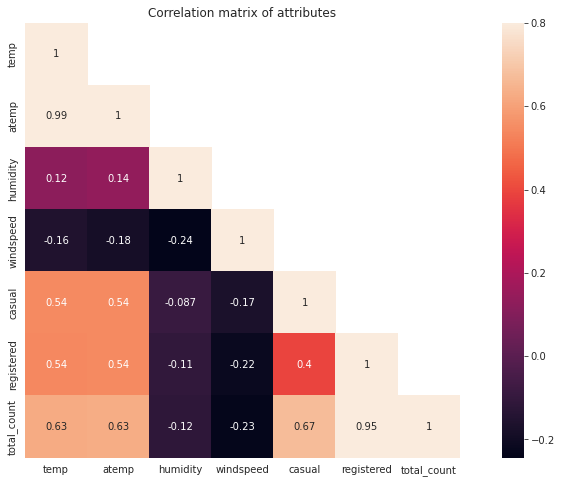

In [ ]:
#Create the correlation matrix
correMtr=data[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

In [ ]:
#load the required libraries
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [ ]:
#Split the dataset into the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.iloc[:,0:-3],data.iloc[:,-1],test_size=0.3, random_state=42)

#Reset train index values
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset train index values
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(y_train.head())
print(y_test.head())

(511, 14) (220, 14) (511, 2) (220, 2)
   index  total_count
0    223         4905
1    684         5445
2    685         5698
3    163         5020
4    394         3624
   index  total_count
0    703         6606
1     33         1550
2    300         3747
3    456         6041
4    633         7538


In [ ]:
#Create a new dataset for train attributes
train_attributes=X_train[['season','month','year','weekday','holiday','workingday','weather_condition','humidity','temp','windspeed']]
#Create a new dataset for test attributes
test_attributes=X_test[['season','month','year','weekday','holiday','workingday','humidity','temp','windspeed','weather_condition']]
#categorical attributes
cat_attributes=['season','holiday','workingday','weather_condition','year']
#numerical attributes
num_attributes=['temp','windspeed','humidity','month','weekday']

In [ ]:
#To get dummy variables to encode the categorical features to numeric
train_encoded_attributes=pd.get_dummies(train_attributes,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (511, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,8,5,0.415000,0.708333,0.125621,0,0,1,0,1,0,0,1,1,0,0,1,0
1,11,4,0.620417,0.321667,0.152987,0,0,0,1,1,0,0,1,0,1,0,0,1
2,11,5,0.524583,0.345000,0.171025,0,0,0,1,1,0,0,1,1,0,0,0,1
3,6,1,0.494583,0.635000,0.305350,0,1,0,0,1,0,0,1,1,0,0,1,0
4,1,1,0.400833,0.269167,0.215792,1,0,0,0,1,0,0,1,1,0,0,0,1


In [ ]:
#Training dataset for modelling
X_train=train_encoded_attributes
y_train=y_train.total_count.values

In [ ]:
#training model
lr_model=linear_model.LinearRegression()
lr_model

LinearRegression()

In [ ]:
#fit the trained model
res= lr_model.fit(X_train,y_train)

In [ ]:
#Accuracy of the model
lr=lr_model.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',lr_model.coef_)
print('Model intercept value :',lr_model.intercept_)

Accuracy of the model : 0.8165025087335218
Model coefficients : [  -25.40093273    69.00041734 -1021.83801516  5265.83269167
 -2556.15204574  -949.34444399   229.82675107   -79.72789531
   799.24558823   228.48467064  -228.48467064   -78.95445063
    78.95445063   761.85445399   252.23446226 -1014.08891625
  -989.30080604   989.30080604]
Model intercept value : 2195.3105623488386


In [ ]:
#Cross validation prediction
predict=cross_val_predict(lr_model,X_train,y_train,cv=3)
predict

array([ 5248.7578435 ,  5038.5615668 ,  5806.79339316,  4353.94868702,
        3738.02165465,  6781.13199665,  6258.53686563,  3802.32154757,
        4679.69060739,  3413.26938345,  5382.26926795,  3103.26413427,
        4340.14502978,  5792.02135524,  4357.90482085,  6307.47067538,
        4382.53420011,  3356.51602988,   722.55880035,   542.99629923,
        7419.07107033,  3747.2639444 ,  5282.38323084,  5494.01243603,
        6941.05375802,  7322.95928003,  3629.5886932 ,  3571.12912785,
         985.45343201,  4884.05952005,  1644.73801661,  1708.88196943,
        1689.90104258,  1295.63879625,  4891.47726849,  5507.81236621,
        6015.17425095,  4180.63057735,  5075.38404498,  5941.56769703,
        6400.40498745,  4215.81855312,  5962.38814912,  6052.71452714,
        3345.73314148,  4096.72004817,  1465.44713372,  3603.17274178,
        4587.89942466,  6650.65699064,  1719.93360965,  6128.15135134,
        6439.33525805,  3277.84008997,  4592.0786174 ,  3194.61235   ,
      

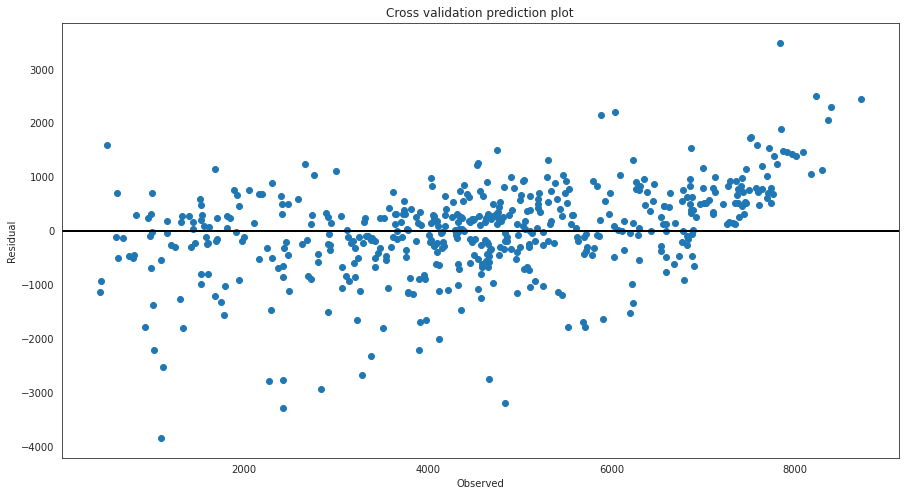

In [ ]:
#Cross validation plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [ ]:
#R-squared scores
r2_scores = cross_val_score(lr_model, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.7995611885231044


In [ ]:
#To get dummy variables to encode the categorical features to numeric
test_encoded_attributes=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of transformed dataframe :',test_encoded_attributes.shape)
test_encoded_attributes.head(5)

Shape of transformed dataframe : (220, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,12,2,0.733750,0.475833,0.174129,0,0,0,1,1,0,0,1,1,0,0,0,1
1,2,4,0.437826,0.186957,0.277752,1,0,0,0,1,0,0,1,1,0,0,1,0
2,10,5,0.585833,0.330833,0.229479,0,0,0,1,1,0,0,1,0,1,0,1,0
3,4,0,0.676250,0.425833,0.172267,0,1,0,0,1,0,1,0,0,1,0,0,1
4,9,2,0.570000,0.550000,0.236321,0,0,0,1,1,0,0,1,1,0,0,0,1


In [ ]:
#Test dataset for prediction
X_test=test_encoded_attributes
y_test=y_test.total_count.values

In [ ]:
#predict the model
lr_pred=lr_model.predict(X_test)
lr_pred

array([6197.12329782, 1378.27938018, 3212.82326914, 4825.6058012 ,
       6672.2308762 , 6942.2039349 ,  693.99373527, 1929.80808599,
       6981.48110092, 6844.67173725, 2798.54559266, 2121.8457389 ,
       4465.68268321, 5486.74428544, 2189.59008463, 1827.67433934,
       2173.48158771, 7469.58027211, 5500.15015098, 2608.49336522,
       6933.20124884, 7837.10306473, 5532.48547104, 1261.13929139,
       1245.46616862, 4479.83361908, 2496.61989036, 6733.37234742,
       3854.86011528, 5802.97615092, 3103.90712661, 4252.34563973,
       6358.26561572, 6798.3144729 , 5790.26253638, 5402.54802544,
       6692.75313381, 5848.44121572, 3180.98457936,  805.80292438,
       4497.72178336, 3746.59014984, 6903.03554988, 4077.94155535,
       6907.0442079 , 1687.7942605 , 4801.49297945, 4723.9530173 ,
       6369.39948476, 4579.39869385, 3105.76669461, 2833.81705416,
       1829.36260472, 5601.65932265, 4625.78263028, 4089.39223053,
       4695.03945324, 3038.41700558, 4351.67190815, 6630.97204

In [ ]:
import math
#Root mean square error 
rmse=math.sqrt(metrics.mean_squared_error(y_test,lr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,lr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 783.0616972625064
Mean absolute error : 594.736843023643


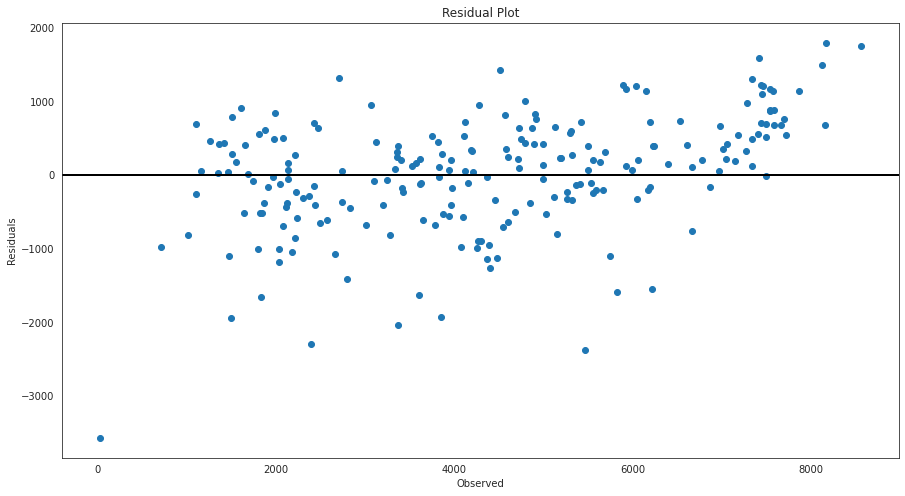

In [ ]:
#Residual plot
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, y_test-lr_pred)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

In [ ]:
import statsmodels.api as sm
data.iloc[:,0:-3] = sm.add_constant(data.iloc[:,0:-3])

In [ ]:
X =data.iloc[:,0:-3]

In [ ]:
y = data.iloc[:,-1]

In [ ]:
print(y)

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: total_count, Length: 731, dtype: int64


In [ ]:
X.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900


In [ ]:
X['datetime'] = X['datetime'].values.astype(float)

In [ ]:
model = sm.OLS(y,X.astype(float)).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                       inf
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                nan
Time:                        05:42:53   Log-Likelihood:                -6555.0
No. Observations:                 731   AIC:                         1.311e+04
Df Residuals:                     730   BIC:                         1.312e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
rec_id             1.245e-30   1.93e-32     64.371      0.000    1.21e-30    1.28e-30
datetime           3.411e-15    5.3e-17     64.371      0.000    3.31e-15    3.51e-15
season             7.047e-33   1.09e-34     64.371      0.000    6.83e-33    7.26e-33
year               1.916e-33   2.98e-35     64.371      0.000    1.86e-33    1.97e-33
month              1.917e-32   2.98e-34     64.371      0.000    1.86e-32    1.98e-32
holiday            7.731e-35    1.2e-36     64.371      0.000     7.5e-35    7.97e-35
weekday            7.652e-33   1.19e-34     64.371      0.000    7.42e-33    7.89e-33
workingday         1.743e-33   2.71e-35     64.371      0.000    1.69e-33     1.8e-33
weather_condition  3.545e-33   5.51e-35     64.371      0.000    3.44e-33    3.65e-33
temp               1.305e-33   2.03e-35     64.371      0.000    1.27e-33    1.35e-33
atemp              1.248e-33   1.94e-35     64.371      0.000    1.21e-33    1.29e-33
humidity           1.607e-33    2.5e-35     64.371      0.000    1.56e-33    1.66e-33
windspeed          4.735e-34   7.36e-36     64.371      0.000    4.59e-34    4.88e-34
==============================================================================
Omnibus:                       59.487   Durbin-Watson:                   0.314
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.040
Skew:                          -0.058   Prob(JB):                     4.45e-05
Kurtosis:                       2.197   Cond. No.                     8.72e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+19. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 4.4 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=76635740924934236d482e8ff552906ae6f9b41c3ed514c3754b8c3cb62467e6
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer


In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification'
)


In [ ]:
explainer = lime_tabular.LimeTabularExplainer(X.values, mode="regression", feature_names=X.columns)
explainer


In [ ]:
import random

In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
print(X_test)

    month weekday  humidity  ...  weather_condition_3  year_0  year_1
0      12       2  0.733750  ...                    0       0       1
1       2       4  0.437826  ...                    0       1       0
2      10       5  0.585833  ...                    0       1       0
3       4       0  0.676250  ...                    0       0       1
4       9       2  0.570000  ...                    0       0       1
..    ...     ...       ...  ...                  ...     ...     ...
215    10       4  0.812917  ...                    0       1       0
216     5       4  0.492917  ...                    0       0       1
217     6       0  0.598750  ...                    0       0       1
218     9       4  0.902083  ...                    0       1       0
219     5       3  0.870000  ...                    0       1       0

[220 rows x 18 columns]


In [ ]:
idx = random.randint(1, len(X_test))


In [ ]:
print("Prediction : ", lr_model.predict(X_test.iloc[2].values.reshape(1,-1)))

Prediction :  [3212.82326914]


In [ ]:
X.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather_condition', 'temp', 'atemp', 'humidity',
       'windspeed'],
      dtype='object')

In [ ]:
print("Actual :     ", y_test[idx])

Actual :      5743


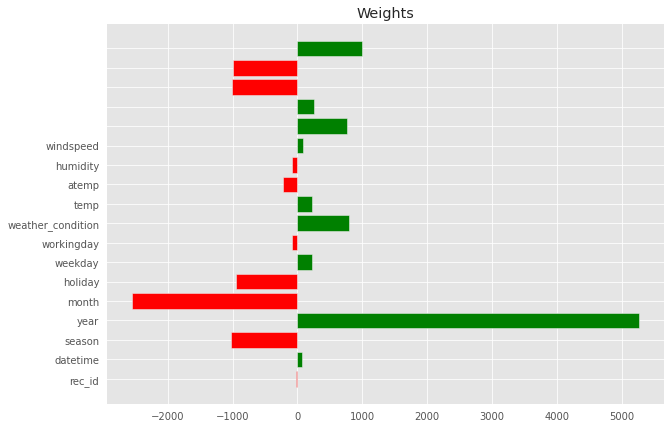

In [ ]:
with plt.style.context("ggplot"):
    fig = plt.figure(figsize=(10,7))
    plt.barh(range(len(lr_model.coef_)), lr_model.coef_, color=["red" if coef<0 else "green" for coef in lr_model.coef_])
    plt.yticks(range(len(lr_model.coef_)), X.columns);
    plt.title("Weights")


In [ ]:
print("Non Zero weights:",np.count_nonzero(lr_model.coef_))

Non Zero weights: 18


In [ ]:
print(lr_model.coef_)

[  -25.40093273    69.00041734 -1021.83801516  5265.83269167
 -2556.15204574  -949.34444399   229.82675107   -79.72789531
   799.24558823   228.48467064  -228.48467064   -78.95445063
    78.95445063   761.85445399   252.23446226 -1014.08891625
  -989.30080604   989.30080604]
